# Development

This notebook is meant for developing the bubble bouncing simulation code.

## 0 Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.sparse import diags, kron, identity, csr_matrix

## 1 Sparse matrix?

I've seen people using sparse matrix to formulate differential equations. Is it faster? Here, let's give it a test. 

The example task is to compute the laplacian of $h$:

$$
\nabla^2 h = \frac{\partial^2 h}{\partial x^2} + \frac{\partial^2 h}{\partial y^2}
$$

The most straightforward method is to compute the $x$ and $y$ terms separately, then sum them. 

In [25]:
# prepare the data
N = 100
h = np.random.rand(N, N)

# compute dx and dy 
global dx, dy
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
dx = np.gradient(X, axis=1, edge_order=2)
dy = np.gradient(Y, axis=0, edge_order=2)

# compute the Laplacian operator
global L2D
# 1D Laplacian matrix for finite difference
diagonals = [-2 * np.ones(N), np.ones(N-1), np.ones(N-1)]
L1D = diags(diagonals, [0, -1, 1], format="csr") / dx**2

# 2D Laplacian using Kronecker product
L2D = kron(identity(N), L1D) + kron(L1D, identity(N))

In [22]:
def laplacian(h):
    """
    Compute the Laplacian of a 2D array using finite differences.
    """
    d2hdx = np.gradient(np.gradient(h, axis=1, edge_order=2), axis=1, edge_order=2) / dx**2
    d2hdy = np.gradient(np.gradient(h, axis=0, edge_order=2), axis=0, edge_order=2) / dy**2
    return d2hdx +d2hdy

In [26]:
def laplacian_sparse(h):
    """
    Compute the Laplacian of a 2D array using sparse matrix representation.
    """
    
    return L2D @ h.flatten()

In [28]:
t0 = time.time()
for i in range(10000):
    laplacian(h)
t1 = time.time()
print(f"np.gradient takes {t1 - t0:.2f} seconds")
t0 = time.time()
for i in range(10000):
    laplacian_sparse(h)
t1 = time.time()
print(f"sparse matrix takes {t1 - t0:.2f} seconds")

np.gradient takes 1.87 seconds
sparse matrix takes 0.46 seconds


Therefore, using sparse matrix can greatly speed up the computation. 

## 2 Apply boundary conditions in flattened array

In square array, applying boundary conditions is straightforward: 

```
h[:, 0], h[:, -1], h[0, :], h[-1, :]
```

when flattened, however, these points are not easy to find. To be able to identify the boundary points quickly with ease, we can define a boolean array `edge_ind` as

```
edge_ind = np.
```

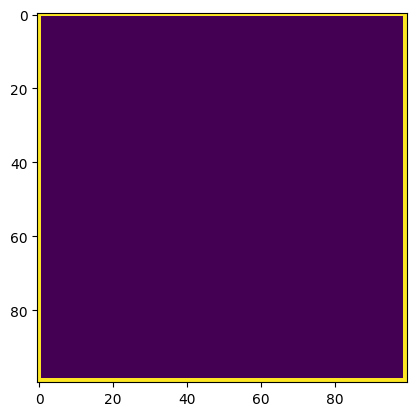

In [ ]:
# Create a boolean array to mark the edges
edge_ind = np.zeros((N, N), dtype=bool)
edge_ind[:, 0], edge_ind[:, -1], edge_ind[0, :], edge_ind[-1, :] = True, True, True, True

plt.imshow(edge_ind)

In [29]:
diagonals = [-np.ones(N-1), np.ones(N-1)]
D_x = diags(diagonals, [-1, 1], shape=(N, N))

In [20]:
D = D_x.toarray()

In [23]:
D[0, :3] = [-3, 4, -1]
D[-1, -3:] = [1, -4, 3]

In [24]:
D

array([[-3.,  4., -1., ...,  0.,  0.,  0.],
       [-1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1., -4.,  3.]])

In [31]:
eye = np.eye(N)

In [34]:
Dx = diags([-1, 1], [-1, 1], shape=(N, N))
Dx = Dx.toarray()
Dx[0, :3] = [-3, 4, -1]
Dx[-1, -3:] = [1, -4, 3]

In [35]:
start_message = "Simulation begins at {}".format(time.asctime())
len(start_message)

45

In [37]:
45-154+214-156+61-10

0

In [38]:
a = np.arange(10)

In [46]:
d2f_num[-2]

299.0139807189705

## 3 Use h5 to save data

In [1]:
import h5py

In [4]:
initial_params = {
    "a": 1,
    "b": 2,
    "c": 3,
}

In [22]:
f = h5py.File(r"C:\Users\liuzy\Documents\BC_simulation\test.h5", "r")

In [18]:
with h5py.File(r"C:\Users\liuzy\Documents\BC_simulation\test.h5", "a") as f:
    new_group = f.create_group("time_steps")
    for key in f.keys():
        if key not in ["initial_params", "forces"]:
            f.move(key, "time_steps/"+key)

## 4 Visualization utility functions

The data is a dense time series of $h$ and $V$. It is good to have some convenient functions that can provide an overview of the data. Useful information includes:

1. The whole trajectory
2. Force history

```
"Time", "Distance", "Velocity_x", "Velocity_y", "Velocity_z", "Buoyancy_x", "Buoyancy_y", "Buoyancy_z", "Drag_x", "Drag_y", "Drag_z", "AMF2_x", "AMF2_y", "AMF2_z", "TFF_x", "TFF_y", "TFF_z", "Sound_x", "Sound_y", "Sound_z"
```

In [62]:
import h5py
f = h5py.File(r"C:\Users\liuzy\Documents\BC_simulation\test2.h5", "r")

In [99]:
f["initial_params"].keys()

<KeysViewHDF5 ['H0', 'N', 'R', 'V0', 'freq', 'g', 'mu', 'rho', 'rm', 'save_time', 'sigma', 'theta']>

In [100]:
R = f["initial_params"]["R"][()]
N = f["initial_params"]["N"][()]
theta = f["initial_params"]["theta"][()]
H = f["initial_params"]["H0"][()]

In [14]:
f.close()

In [81]:
import numpy as np
V = f["forces"][()][:, [2,4]]
t = f["forces"][()][:, 0]


In [110]:
np.diff(t).shape

(79,)

In [112]:
t_broadcasted = np.diff(t)[:, np.newaxis]
traj = (V[:-1, :] * t_broadcasted).cumsum(axis=0)
# traj[:, 1] -= traj[0, 1]
traj[:, 1] += R + H

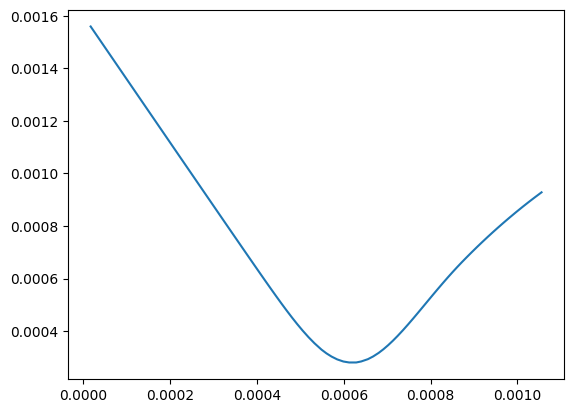

In [113]:
import matplotlib.pyplot as plt
plt.plot(traj[:, 0], traj[:, 1])

In [114]:
xs = np.array([traj[:,0].min(), traj[:,0].max()])
ys = np.array([0, 0])
surface = np.array([xs, ys]).T

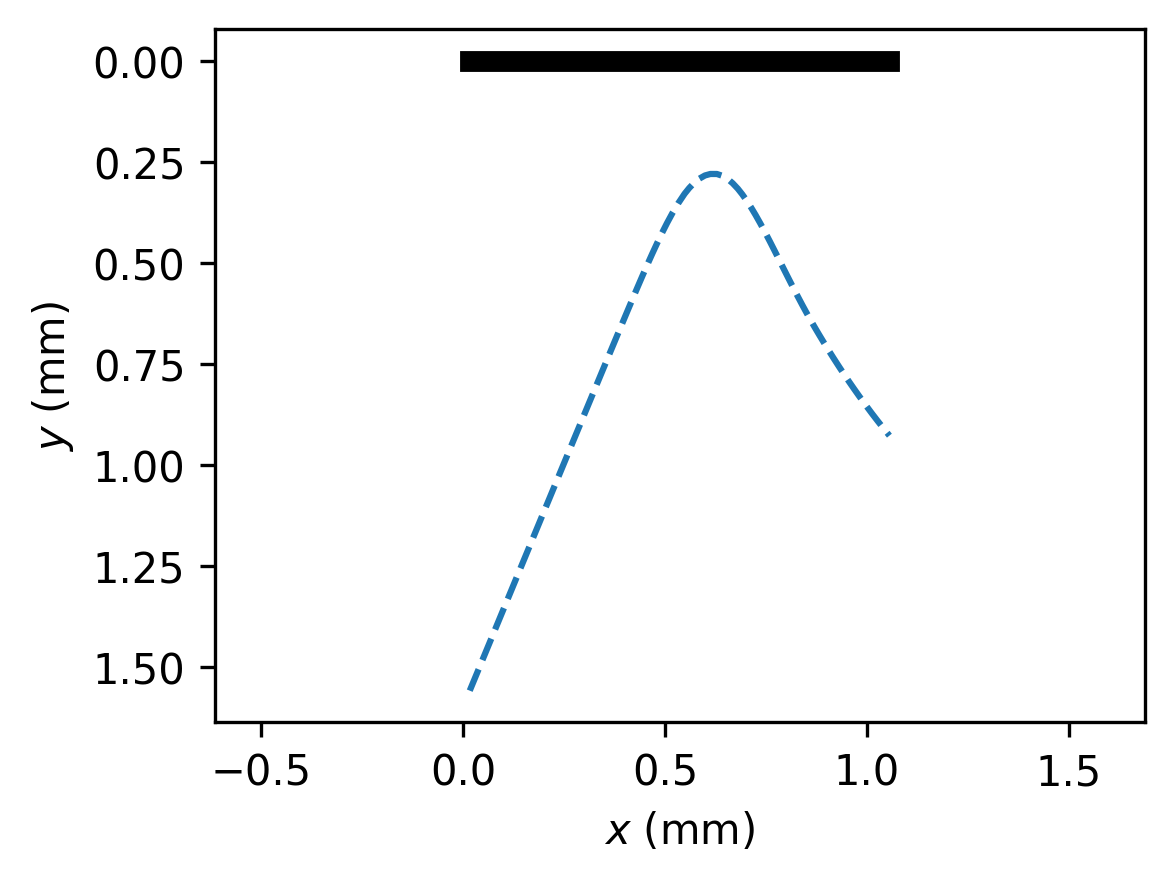

In [115]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300)
ax.plot(traj[:,0]*1e3, traj[:,1]*1e3, ls="--")
ax.plot(surface[:, 0]*1e3, surface[:, 1]*1e3, lw=5, color="black")
ax.set_xlabel("$x$ (mm)")
ax.set_ylabel("$y$ (mm)")
ax.axis("equal")
ax.invert_yaxis()

In [118]:
rotation_matrix = np.array([[np.cos(theta/180*np.pi), -np.sin(theta/180*np.pi)],
                            [np.sin(theta/180*np.pi),  np.cos(theta/180*np.pi)]])

In [120]:
# rotate all the artists
trajr = traj @ rotation_matrix
surfacer = surface @ rotation_matrix

(-0.05007439598857767,
 1.3960541371192237,
 1.5258107246713026,
 -0.4958356854853372)

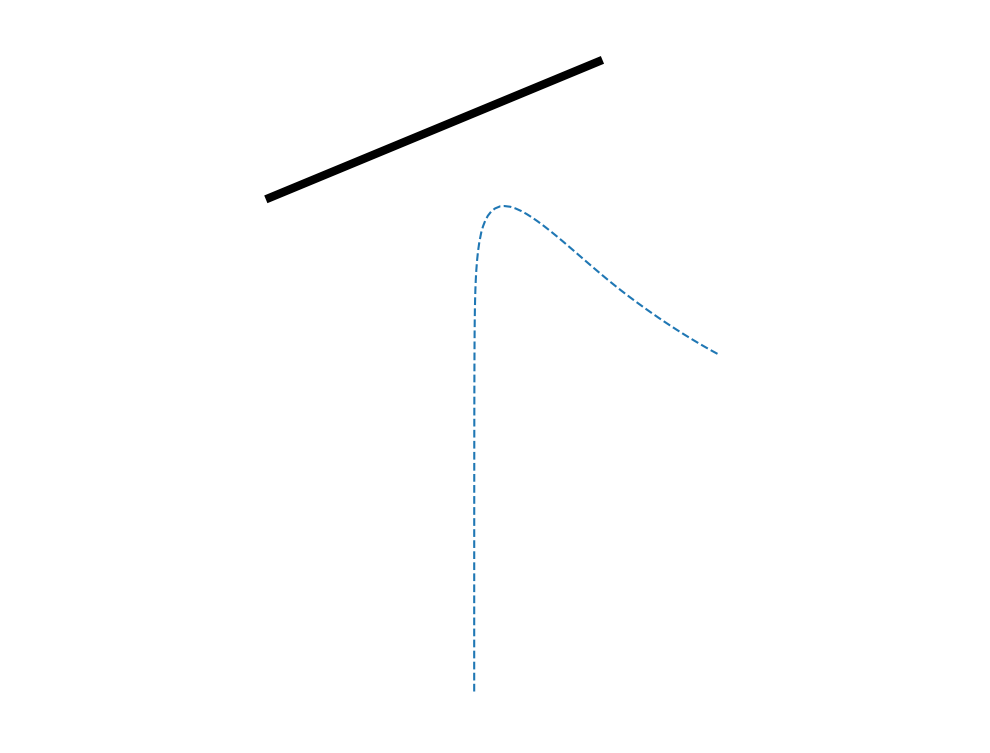

In [125]:
from myimagelib import bestcolor
fig, ax = plt.subplots(figsize=(4,3), dpi=300)
ax.plot(trajr[:,0]*1e3, trajr[:,1]*1e3, ls="--", lw=.5, color=bestcolor(0))
ax.plot(surfacer[:, 0]*1e3, surfacer[:, 1]*1e3, lw=2, color="black")
ax.invert_yaxis()
# ax.set_ylim([trajrm[:, 1].max()*1e3, trajrm[:, 1].min()*1e3])
ax.axis("equal")
ax.axis("off")

In [ ]:
for tt in range(len(time_steps)):
    xx = x + (trajarr[time_steps[i], 0] - trajarr[0, 0])
    hx = np.loadtxt(os.path.join(folder, sfL2[time_steps[i]], "h.txt")).reshape(N, N)[N//2, :]
    bubble_surface[i] = np.stack([xx, hx], axis=1)

In [ ]:
cmap = plt.get_cmap("viridis", len(time_steps))
fig, ax = plt.subplots(figsize=(4,3), dpi=300)
ax.plot(trajarr[:,0]*1e3, trajarr[:,1]*1e3, ls="--", lw=.5, color="black")
ax.plot(surface[:, 0]*1e3, surface[:, 1]*1e3, lw=1, color="black")
for i in range(len(time_steps)):
    t = time_steps[i]
    ax.plot(bubble_surface[i][:, 0]*1e3, bubble_surface[i][:, 1]*1e3, lw=2, color=cmap(i))
    circ = plt.Circle(xy=trajarr[t, :]*1e3, radius=R*1e3, edgecolor=cmap(i), fill=False, ls="--")
    ax.add_patch(circ)
ax.set_xlabel("$x$ (mm)")
ax.set_ylabel("$z$ (mm)")
ax.axis("equal")
ax.invert_yaxis()

In [61]:
f.close()

In [33]:
dset = f.create_dataset("data", shape=(100,10), maxshape=(None,None), dtype="f8")

In [60]:
f.keys()

<KeysViewHDF5 ['data']>

In [56]:
for i in range(12):
    dset[i*10:i*10+10, :] = np.random.rand(10, 10)

In [57]:
dset[()]

array([[0.26803724, 0.61613987, 0.12427203, 0.31726582, 0.0429222 ,
        0.66349634, 0.57680864, 0.25716589, 0.98121486, 0.75464417],
       [0.88983059, 0.79721661, 0.37062271, 0.44112153, 0.61319578,
        0.4249476 , 0.29775595, 0.89302208, 0.44296135, 0.13620948],
       [0.77276416, 0.4758136 , 0.40421745, 0.38741589, 0.30640194,
        0.96415774, 0.68747263, 0.96173778, 0.24962327, 0.08780027],
       [0.62848719, 0.05421151, 0.29332916, 0.78984296, 0.54795799,
        0.96804105, 0.06762311, 0.80670348, 0.25284293, 0.14247265],
       [0.26932765, 0.42878295, 0.83910365, 0.16768816, 0.70777201,
        0.77428153, 0.74119542, 0.4052244 , 0.24263191, 0.41009201],
       [0.62846239, 0.79905027, 0.33471223, 0.47962482, 0.07159367,
        0.61058471, 0.05776003, 0.94246221, 0.935351  , 0.238842  ],
       [0.06484111, 0.84977686, 0.75483641, 0.95728727, 0.25443791,
        0.80432308, 0.43377555, 0.61660037, 0.71054888, 0.36318164],
       [0.51005221, 0.30247058, 0.6094298

In [38]:
np.array(dset)

array([[9.06902548e-01, 2.02379046e-01, 3.80346283e-01, 1.96232813e-01,
        1.80433934e-01, 7.74386889e-01, 8.07012747e-01, 9.31994814e-01,
        5.30442707e-01, 8.00664030e-01],
       [9.79997016e-01, 1.95494928e-01, 5.14679391e-01, 9.11663649e-01,
        4.81743462e-01, 4.40909644e-01, 2.07695128e-01, 8.49394535e-01,
        9.44696646e-01, 5.34318090e-02],
       [7.60713836e-01, 1.22916796e-01, 8.95627085e-01, 8.44643302e-01,
        3.38184842e-01, 2.46749014e-01, 1.05572670e-01, 8.00880297e-01,
        2.68436108e-01, 9.47344544e-01],
       [9.51680556e-01, 2.92798758e-01, 3.84641538e-01, 3.47768192e-01,
        3.93931894e-01, 3.35492022e-01, 6.89115518e-01, 9.83659685e-01,
        3.69885187e-02, 3.08554556e-01],
       [2.20239363e-01, 3.89337273e-01, 3.46110441e-01, 3.44504787e-02,
        7.77404858e-01, 4.20908643e-01, 7.80633986e-01, 1.70268774e-01,
        9.17291417e-01, 5.27501195e-01],
       [1.09618469e-01, 4.71813673e-01, 6.79966677e-01, 5.30810733e-01,
   

In [20]:
f["data"].resize(10, 5)

TypeError: Only chunked datasets can be resized